In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
air_df = pd.read_csv('Airdata.csv')

## About the DataSet

The Airdata.csv air quality dataset comprises hourly recordings of the year 2020 from three locations. The dataset—apart from NO2 readings for three locations A, B, and C—has DateTime, Temperature, Humidity, Wind_Speed, and Wind_Direction readings. The following shows the first and last few rows of the dataset


In [3]:
air_df

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C
0,1/1/2020 0:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37
1,1/1/2020 1:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53
2,1/1/2020 2:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80
3,1/1/2020 3:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80
4,1/1/2020 4:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43
...,...,...,...,...,...,...,...,...
8779,12/31/2020 19:00,4.920528,72,4.553680,251.565060,53.44,32.65,66.82
8780,12/31/2020 20:00,4.990529,74,3.259939,186.340200,49.80,34.03,67.31
8781,12/31/2020 21:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33
8782,12/31/2020 22:00,3.820528,88,8.435069,219.805570,39.88,19.90,43.70


In [4]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        8784 non-null   object 
 1   Temperature     8784 non-null   float64
 2   Humidity        8784 non-null   int64  
 3   Wind_Speed      8784 non-null   float64
 4   Wind_Direction  8784 non-null   float64
 5   NO2_Location_A  8664 non-null   float64
 6   NO2_Location_B  8204 non-null   float64
 7   NO2_Location_C  8652 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 549.1+ KB


## Detecting Missing values

In [15]:
for col in air_df.columns:
    n_MV = sum(air_df[col].isna())
    print(f'number of missing values in column {col} : {n_MV}')

number of missing values in column DateTime : 0
number of missing values in column Temperature : 0
number of missing values in column Humidity : 0
number of missing values in column Wind_Speed : 0
number of missing values in column Wind_Direction : 0
number of missing values in column NO2_Location_A : 120
number of missing values in column NO2_Location_B : 580
number of missing values in column NO2_Location_C : 132


Missing values are present in the *NO2_Location_A*, *NO2_Location_B*, and *NO2_Location_C*  columns

## Diagnosis of missing values overview

Are the missing values in *NO2_Location_A*, *NO2_Location_B*, and *NO2_Location_C* columns of type **MCAR** (missing completely at random), **MAR** (missing at random), or **MNAR** (missing not at random)?

All we need to do is investigate whether there is a relationship between the hidden binary variable of the attribute with missing values and the other attributes in the dataset. The following points show the kinds of relationships we would expect to define the type of missing values

* MCAR: We don't expect the hidden binary variable to have a meaningful relationship with the other attributes.
* MAR: We expect a meaningful relationship between the hidden binary variable and at least one of the other attributes.
* MNAR: We expect a strong relationship between the hidden binary variable and at least one of the other attributes.


There are two methods to diagnose missing values: visual and statistical methods.


## Diagnosing missing values based on numerical attributes

There are four numerical attributes in the data: Temperature, Humidity, Wind_Direction, and Wind_Speed. There is also one DateTime attribute in the data that can be unpacked into four categorical attributes: month,day, hour, and weekday. The way we need to run the analysis is different for numerical attributes than for categorical attributes. So, first, we will learn about numerical attributes, and then we will turn our attention to categorical attributes. 

Let's start with the Temperature numerical attribute. Also, we'll first do the diagnosis visually and then we will do it statistically.

### Diagnosing missing values in *NO2_Location_A* based on *Temperature* attribute

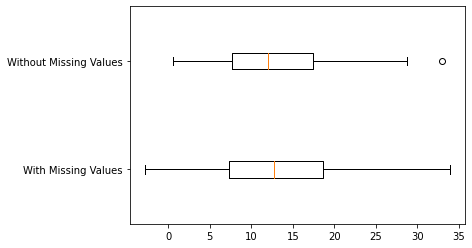

In [6]:
# visual method (box_plot)

# Get missing values
BM_MV = air_df.NO2_Location_A.isna()
# Creating labels for graph
MV_labels = ['With Missing Values','Without Missing Values']

# create a series with the boolean mask
box_sr = pd.Series('',index = BM_MV.unique())

for poss in BM_MV.unique():
    BM = BM_MV == poss
    box_sr[poss] = air_df[BM].Temperature
    
plt.boxplot(box_sr, vert=False)

plt.yticks([1,2],MV_labels)
plt.show()


Looking at the boxplot, we can see that the value of Temperature does not meaningfully change between the two populations. That shows that a change in Temperature could not have caused or influenced the occurrence of missing values under *NO2_Location_A*.



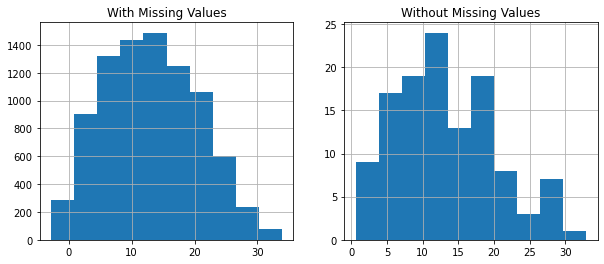

In [16]:
# visual method histogram
BM_MV = air_df.NO2_Location_A.isna()
temp_range = (air_df.Temperature.min(),air_df.Temperature.max())
MV_labels = ['With Missing Values','Without Missing Values']

plt.figure(figsize=(10,4))

for i,poss in enumerate(BM_MV.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_MV == poss
    air_df[BM].Temperature.hist()
    plt.xlim = temp_range
    plt.title(MV_labels[i])

plt.show()

The histogram confirms the same conclusion we arrived at when using boxplots. As we do not see a significant difference between the two populations, we conclude that the value of Temperature could not have influenced or caused the occurrence of missing values.

Lastly, we would also like to confirm this using a statistical method: a two-sample t-test. The two-sample t-test evaluates whether the value of a numerical attribute is significantly different among the two groups. groups. The two groups here are the data objects having missing values under NO2_Location_A and the data objects without missing values under NO2_Location_A. 

The significance level considered in this report is 0.05

 

In [20]:
# using statistical method

from scipy.stats import ttest_ind 

BM_MV = air_df.NO2_Location_A.isna()
ttest_ind(air_df[BM_MV].Temperature, air_df[~BM_MV].Temperature)

Ttest_indResult(statistic=0.05646499065315542, pvalue=0.9549726689684548)

The p-value of the t-test is very large—0.95 out of 1, which means we do not have any reason to suspect the value of Temperature can be meaningfully different between the two groups. This conclusion confirms the one that we arrived at using boxplots and histograms.


### Diagnosing missing values based on all the numerical attributes

In [17]:
# Writing a function to diagnose the missing values both visually and statistically (numerical attrbiutes)
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}
    
    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())    
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])
   
    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()
    
    plt.figure(figsize=(10,4))
    
    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()
    
    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()
    
    p_value = ttest_ind(group_1_data,group_2_data).pvalue
    
    print('p-value of t-test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for Temperature:


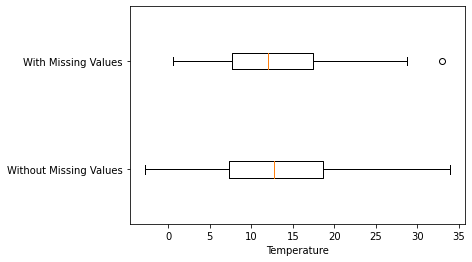

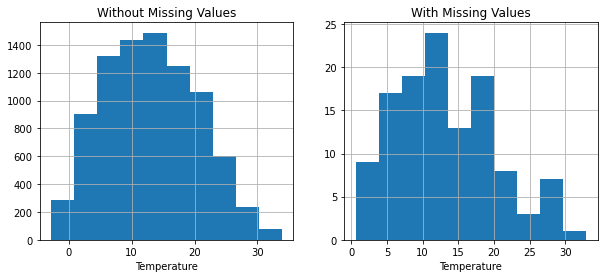

p-value of t-test: 0.9549726689684548
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Humidity:


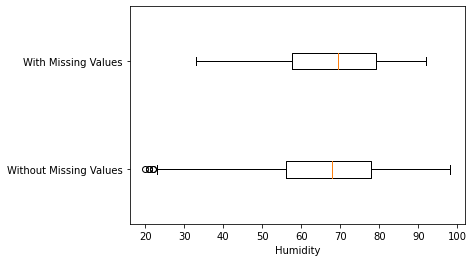

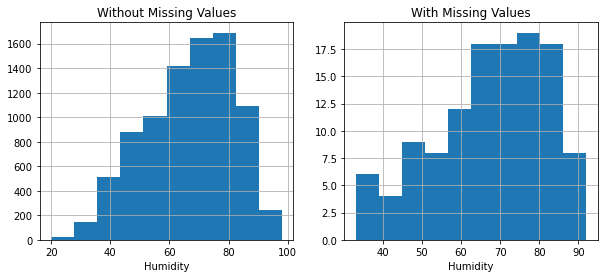

p-value of t-test: 0.5593319830352679
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Speed:


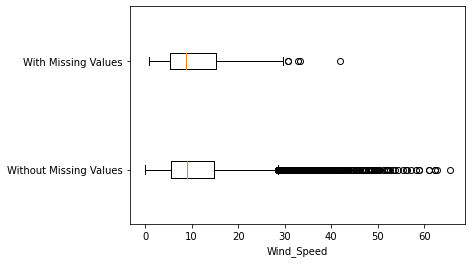

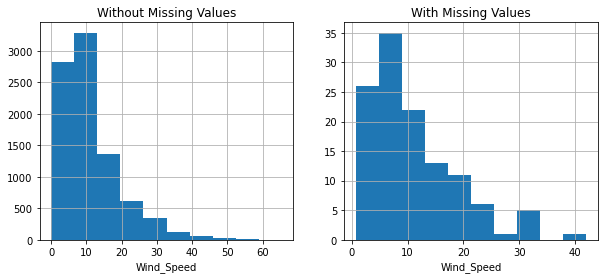

p-value of t-test: 0.8172472856083665
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Direction:


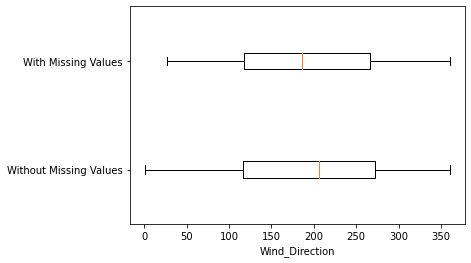

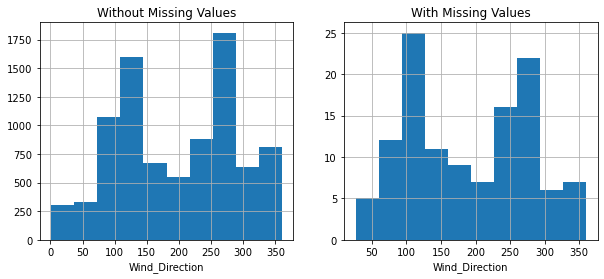

p-value of t-test: 0.39869195396670654
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [18]:
# Diagnosing all the other attributes present in the dataset visually and statistically.

#Get the numerical attrbiutes from air_df
numerical_attributes = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']
# create the boolean mask of missing values 
BM_MV = air_df.NO2_Location_A.isna()
# loop through each numerical attribute and run the Diagnose_MV_Numerical()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

four diagnosis reports are produce, one for each of the numerical attributes. Each report has three parts: diagnosis using boxplots, diagnosis using a histogram, and diagnosis using a t-test.

Studying the ensuing reports, we can notice that the tendency of the missing value under *NO2_Location_A* does not change based on values of either numerical attribute in the data. This means that there is no meaningful relationship between the hidden binary variable (i.e., *NO2_Location_A*) and the the other numerical attributes. 

## Diagnosing missing values based on categorical attributes

Next, we will do a similar coding and analysis for categorical attributes. Let's start by running the analysis on one categorical attribute then I will create a code to analyze all the remaining categorical attributes.


## Diagnosing missing values in *NO2_Location_A* based on weekday 

First, we need to unpack the air_df.DateTime attribute to get the following categorical attributes: weekday, day, month, and hour.

In [23]:
# converting DateTime attribute to pd Timestamp
air_df.DateTime = pd.to_datetime(air_df.DateTime)

# Get the month attribute
air_df['month'] = air_df.DateTime.dt.month

# Get the day attribute
air_df['day'] = air_df.DateTime.dt.day

# Get the hour attribute
air_df['hour'] = air_df.DateTime.dt.hour

# Get the weekday attribute
air_df['weekday'] = air_df.DateTime.dt.day_name()



In [26]:
air_df

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C,month,day,hour,weekday
0,2020-01-01 00:00:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37,1,1,0,Wednesday
1,2020-01-01 01:00:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53,1,1,1,Wednesday
2,2020-01-01 02:00:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80,1,1,2,Wednesday
3,2020-01-01 03:00:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80,1,1,3,Wednesday
4,2020-01-01 04:00:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43,1,1,4,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,4.920528,72,4.553680,251.565060,53.44,32.65,66.82,12,31,19,Thursday
8780,2020-12-31 20:00:00,4.990529,74,3.259939,186.340200,49.80,34.03,67.31,12,31,20,Thursday
8781,2020-12-31 21:00:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33,12,31,21,Thursday
8782,2020-12-31 22:00:00,3.820528,88,8.435069,219.805570,39.88,19.90,43.70,12,31,22,Thursday


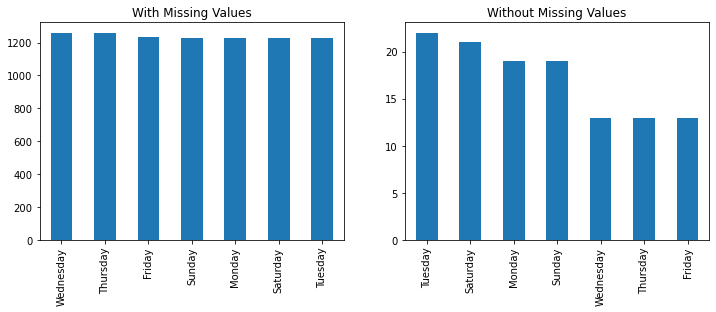

In [43]:
# Using visual method
BM_MV = air_df.NO2_Location_A.isna()
MV_label = ['With Missing Values','Without Missing Values']

plt.figure(figsize=(12,4))
for i,poss in enumerate(BM_MV.unique()):
    BM = BM_MV == poss
    plt.subplot(1,2,i+1)
    air_df[BM].weekday.value_counts().plot.bar()
    plt.title(MV_labels[i])
    

From the above bar graph, we can see that the missing values could have happened randomly and we don't have a meaningful trend to believe there is a systematic reason for the missing values happening due to a change of the value of airt_df.weekday.

We can also do a similar diagnosis using a chi-square test of independence statistical test. In short and for this situation, this test hypothesizes that there is no relationship between the occurrence of missing values and the weekday attribute. Based on this hypothesis, the test calculates a p-value that is the probability of the data we have happening if the hypothesis is true. Using that p-value, we can decide whether we have any evidence to suspect a systematic reason for missing values.



In [34]:
# using statistical method; Chi-square test

from scipy.stats import chi2_contingency
BM_MV = air_df.NO2_Location_A.isna()

# Create a contigency table
contigency_table = pd.crosstab(BM_MV, air_df.weekday)
contigency_table

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
NO2_Location_A,,,,,,,
False,1235,1229,1227,1229,1259,1226,1259
True,13,19,21,19,13,22,13


In [38]:
# Get the p_value of the chi-square test
chi2_contingency(contigency_table)[1]

0.41772751510388023

Having a p-value of 0.4127 confirms the observation we made in the preceding bar graph which is that there is no relationship between the occurrence of missing values in *air_df.NO2_Location_A* and the value of weekday, and the fact that the missing values happened the way they did could have just been a random chance.


The code and analysis for the rest of the categorical attributes are similar. Next, I will create a code that outputs all we need for missing value diagnosis using categorical attributes.



### Diagnosing missing values based on all the categorical attributes

In [47]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(14,6))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])   
    p_value = chi2_contingency(contigency_table)[1]
    
    print('p-value of Chi_squared test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for month:


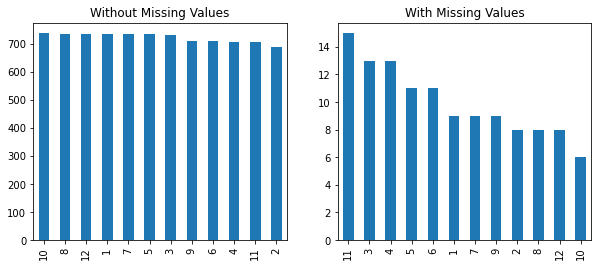

p-value of Chi_squared test: 0.7096565832929861
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for day:


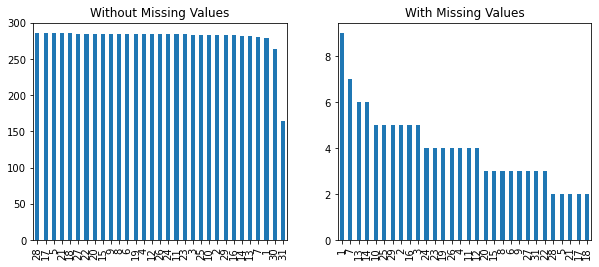

p-value of Chi_squared test: 0.8040640724986007
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for hour:


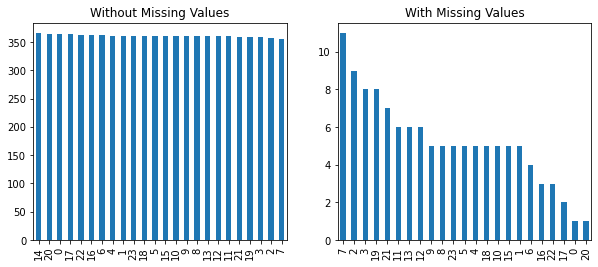

p-value of Chi_squared test: 0.12725321642668141
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for weekday:


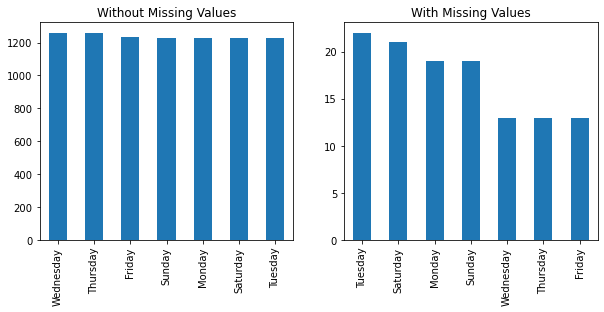

p-value of Chi_squared test: 0.41772751510388023
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [40]:
categorical_attributes = ['month', 'day','hour', 'weekday']

BM_MV = air_df.NO2_Location_A.isna()
for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')


# Conclusion I

From the previous analysis, we do see that none of the attributes in the data—namely, *Temperature, Humidity, Wind_Speed, Wind_Direction, weekday, day, month, and hour—* may have influenced the tendency of missing values in *NO2_Location_A*. Based on all the diagnoses that we ran for the missing values, we conclude that missing values in NO2_Location_A are of the **MCAR** type.


# Diagnosing missing values in *NO2_Location_B*



Diagnosis Analysis of Missing Values for Temperature:


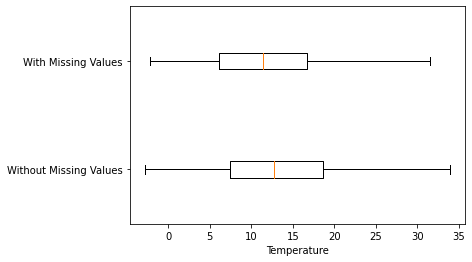

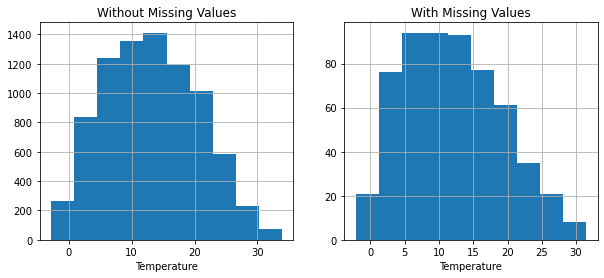

p-value of t-test: 0.00018958810621204925
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Humidity:


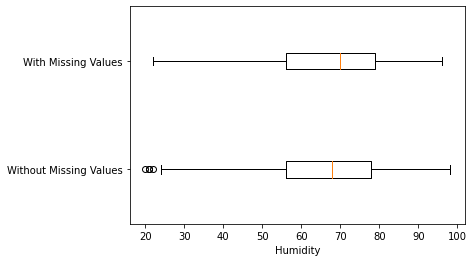

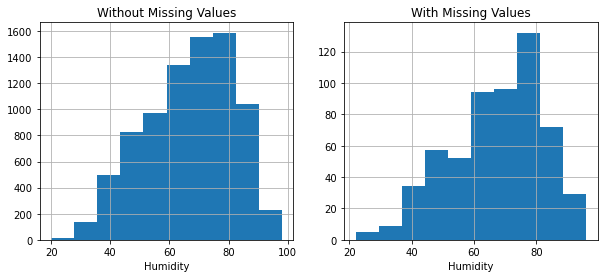

p-value of t-test: 0.43891454332709945
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Speed:


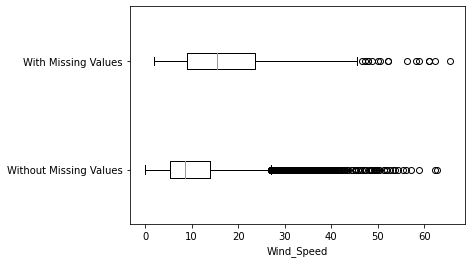

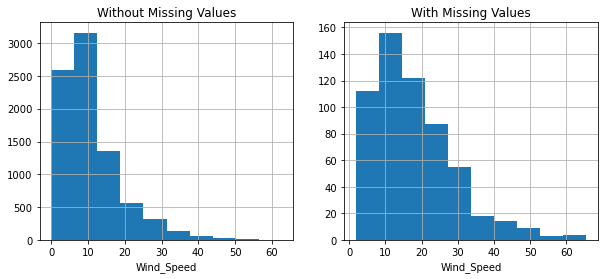

p-value of t-test: 1.3126894108159327e-85
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Direction:


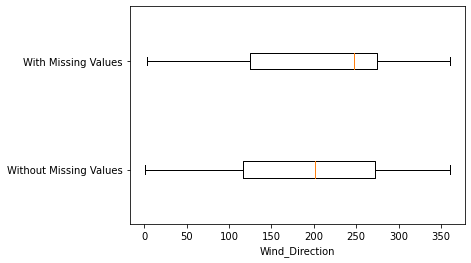

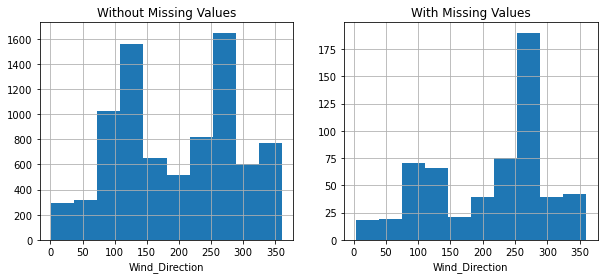

p-value of t-test: 5.8398056632254833e-05
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for month:


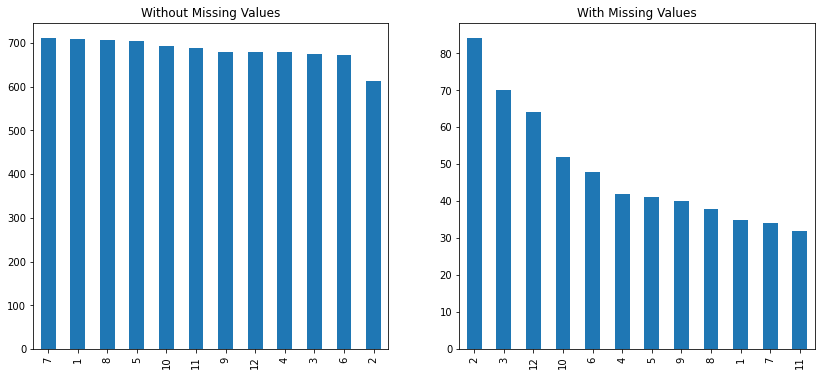

p-value of Chi_squared test: 1.8048364819875927e-10
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for day:


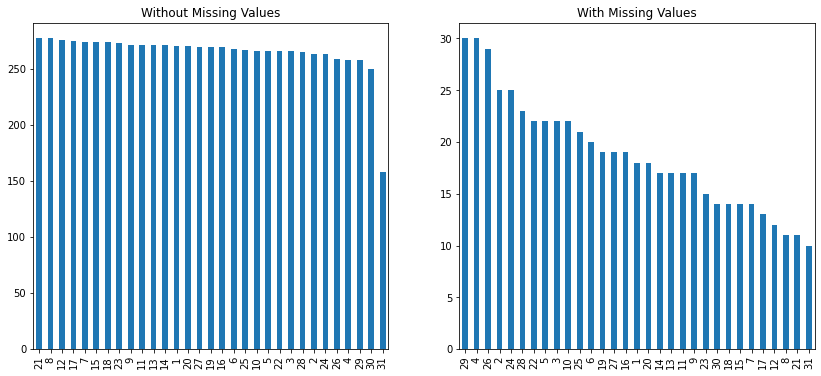

p-value of Chi_squared test: 0.034816691411564224
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for hour:


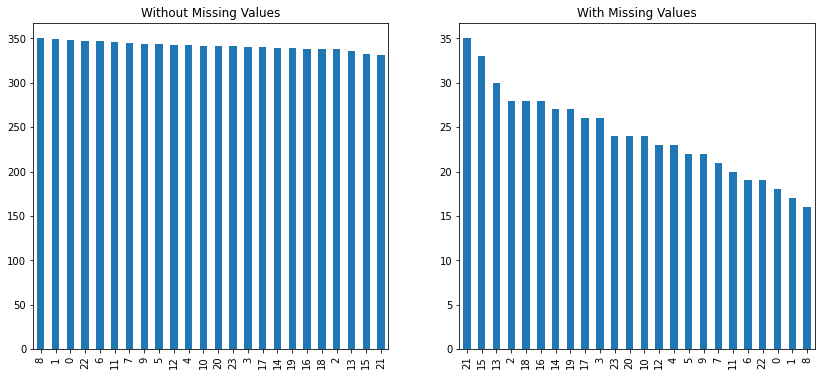

p-value of Chi_squared test: 0.3949474320151337
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for weekday:


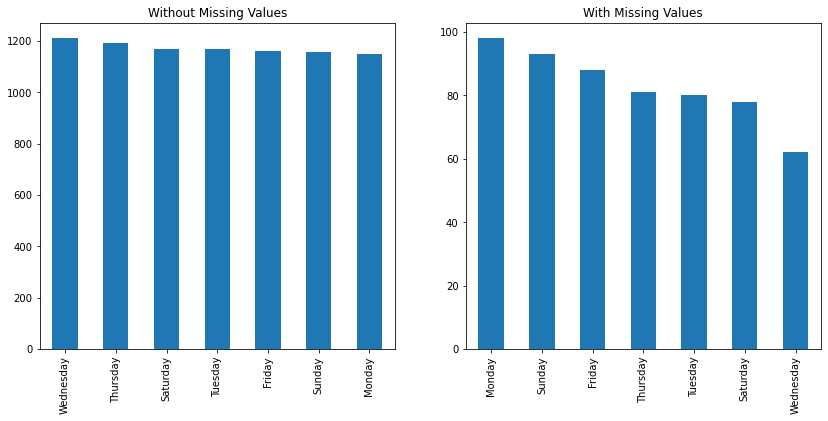

p-value of Chi_squared test: 0.07073083108612685
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [48]:
categorical_attributes = ['month', 'day','hour', 'weekday']
numerical_attributes = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']

BM_MV = air_df.NO2_Location_B.isna()

for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

## Conclusion II

After studying the report, we can see that there are a couple of attributes that seem to have a meaningful relationship with the occurrence of missing values. These attributes are Temperature, Wind_Speed, Wind_Direction, day, and month. 

**Wind_Speed** has the strongest relationship with the missing values. From the results of the diagnosis of the missing values based on the *wind_speed*, we can see that there is a significant difference in the values of *wind_speed* between data objects that have missing values under *NO2_Location_B* attribute and data objects that don't have missing values. 

* The Temperature boxplot suggests that a lower temperature value tends to increase the chance of *NO2_Location_B* having missing values. 
* The *wind_speed* boxplot suggests that a higher *Wind_Speed* value tends to increase the chance of *NO2_Location_B* having missing values. 

This suggests that the sensor skips recording when the temperature is lower and the wind speed is higher. If this hypothesis could be confirmed with the manufacturer, only then we can conclude that the missing values under *NO2_Location_B* are of the **MAR** type. 





## Further investigation:
1. How come the missing values also showed meaningful patterns with Temperature, Wind_Direction, and month? Does wind_speed have a strong relationship with Temperature , wind_direction, and month?



## Diagnosing missing values in NO2_Location_C


Diagnosis Analysis of Missing Values for Temperature:


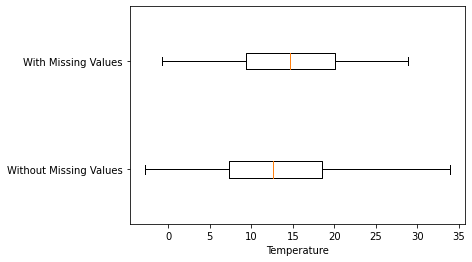

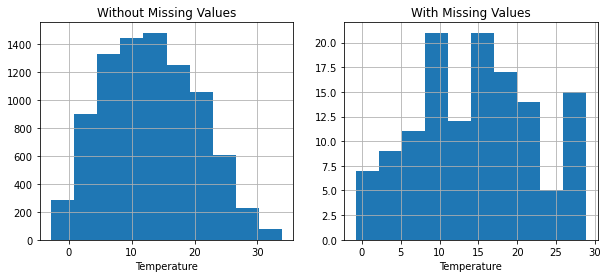

p-value of t-test: 0.01981913552818646
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Humidity:


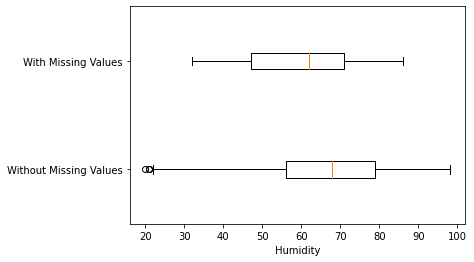

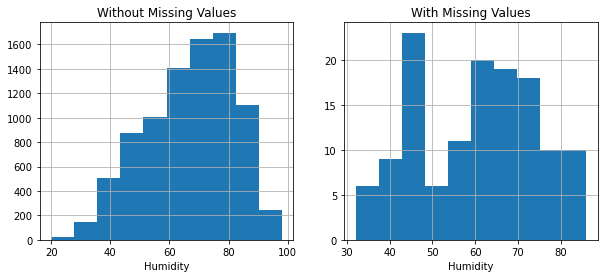

p-value of t-test: 8.179400599849167e-07
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Speed:


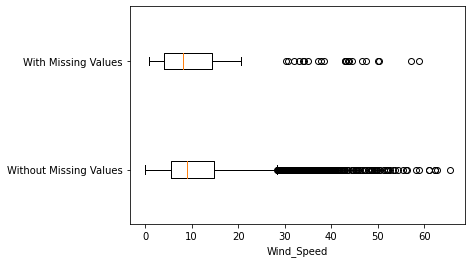

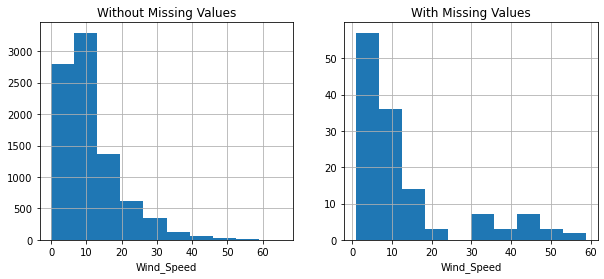

p-value of t-test: 0.01359796253829262
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Direction:


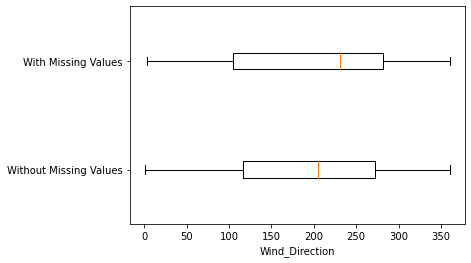

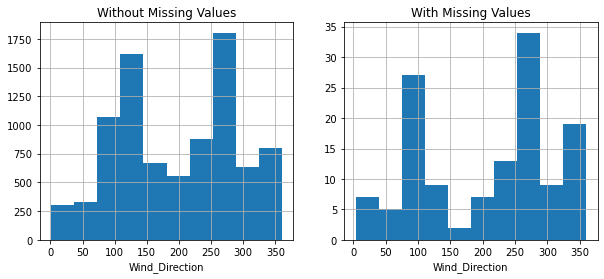

p-value of t-test: 0.3083081973623661
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for month:


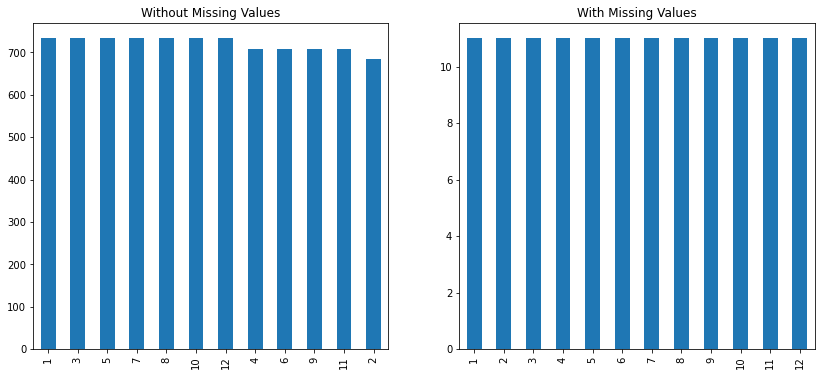

p-value of Chi_squared test: 0.9999999999839941
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for day:


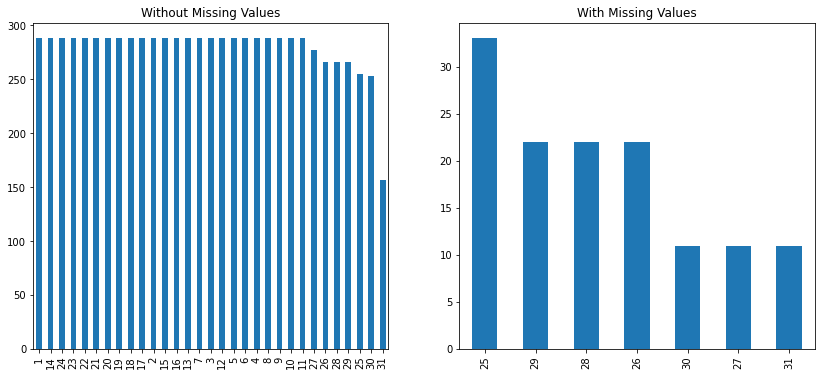

p-value of Chi_squared test: 4.5607973056357013e-101
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for hour:


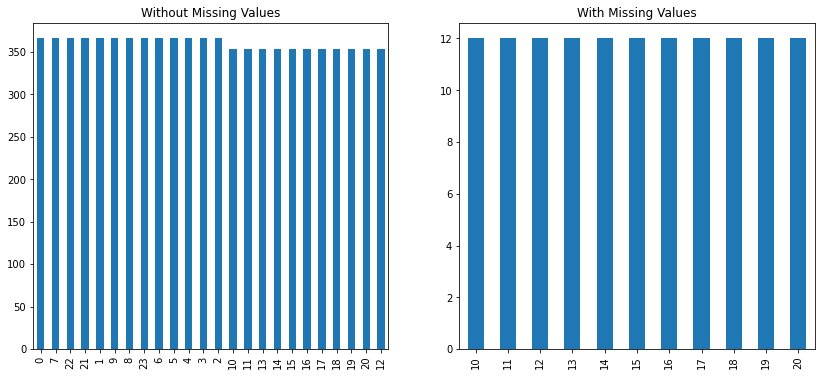

p-value of Chi_squared test: 3.3850851028854862e-22
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for weekday:


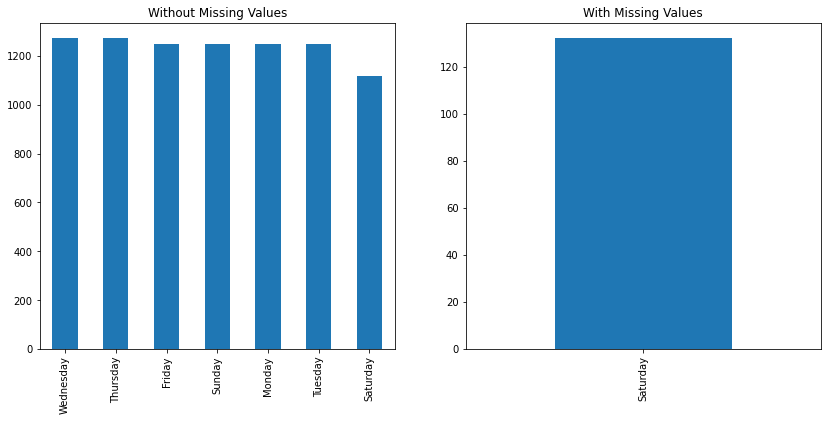

p-value of Chi_squared test: 1.554165460861991e-171
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [50]:
BM_MV = air_df.NO2_Location_C.isna()

for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

## Conclusion III

The diagnosis report shows a relationship between the tendency of missing values and most of the attributes—namely, Temperature, Humidity, Wind_Speed, day, month, hour, and weekday. However, the relationship with the weekday attribute is the strongest.

exclusively on Saturdays. The p-value of the chi-square test is very small.


The diagnosis based on hour and day also shows meaningful patterns (the diagnosis report for the hour and day attributes is not printed here, but please look at the report you just created). The missing values happen equally only when the value of the hour attribute is 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, and 20, or when the value of the day attribute is 25, 26, 27, 28, and 29. 

From these reports, we can deduce that the missing values happen predictably on the last Saturday of every month from 10 A.M. to 8 P.M. That is the pattern we see in the data, but why? A physical investigation with the local authority in Location C is needed to understand why the sensor is not recording data on that specific day and period of time. 

This last piece of information and the diagnosis brings us to the conclusion that the missing value in *NO2_Location_C* is an **MNAR** value. Such values are missed due to a direct reason as to why the data was being collected in the first place. A lot of times when a dataset has a significant number of MNAR missing values, the dataset becomes worthless and cannot be of value in meaningful analytics. A very first step in dealing with MNAR missing values is to prevent them from happening ever again.


## END